In [1]:
from heartpredictions.LSTM import *
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data location

In [2]:
data_path = "../data/clean_data_LSTM.csv"
save_directory = os.path.join(os.path.join("current_accuracies", "LSTM"), "LSTM_weights")
accuracies_file_path = "current_accuracies/LSTM/LSTM.pkl"

In [3]:
if not os.path.isdir(save_directory):
    os.mkdir(save_directory)

# Load data

In [4]:
df = pd.read_csv(data_path)

In [5]:
df.shape

(9618, 39)

In [6]:
df.columns

Index(['RANDID', 'SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE',
       'CIGPDAY', 'BMI', 'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'educ',
       'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'TIME', 'PERIOD',
       'HDLC', 'LDLC', 'DEATH', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD',
       'STROKE', 'CVD', 'HYPERTEN', 'TIMEAP', 'TIMEMI', 'TIMEMIFC', 'TIMECHD',
       'TIMESTRK', 'TIMECVD', 'TIMEDTH', 'TIMEHYP'],
      dtype='object')

In [7]:
df.iloc[:, 1: 23].columns, df.iloc[:, 23: 31].columns

(Index(['SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'BMI',
        'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'educ', 'PREVCHD',
        'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'TIME', 'PERIOD', 'HDLC',
        'LDLC'],
       dtype='object'),
 Index(['DEATH', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD', 'STROKE', 'CVD',
        'HYPERTEN'],
       dtype='object'))

In [8]:
print(df.iloc[:, 1: 23].shape[1], df.iloc[:, 23: 31].shape[1])

22 8


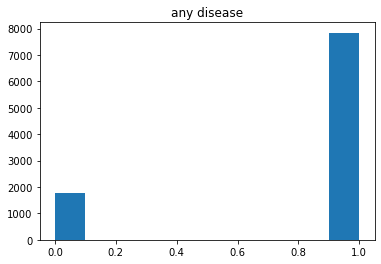

In [9]:
data = np.loadtxt(data_path, delimiter=",", dtype=np.float32, skiprows=1)
amax_label = np.amax(data[:, 23:31], axis=1)
hist,bins = np.histogram(amax_label) 

plt.hist(amax_label, bins = bins) 
plt.title("any disease") 
plt.show()

In [10]:
df

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,6238.0,0.0,250.0,46.0,121.0,81.0,0.0,0.0,28.73,0.0,...,0.0,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0
1,6238.0,0.0,260.0,52.0,105.0,70.0,0.0,0.0,29.43,0.0,...,0.0,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0
2,6238.0,0.0,237.0,58.0,108.0,66.0,0.0,0.0,28.50,0.0,...,0.0,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0
3,11252.0,0.0,285.0,46.0,130.0,84.0,1.0,23.0,23.10,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,4285.0
4,11252.0,0.0,343.0,51.0,109.0,77.0,1.0,30.0,23.48,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,4285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9613,9998212.0,1.0,173.0,46.0,126.0,82.0,0.0,0.0,19.17,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,0.0
9614,9998212.0,1.0,153.0,52.0,143.0,89.0,0.0,0.0,25.74,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,0.0
9615,9999312.0,0.0,196.0,39.0,133.0,86.0,1.0,30.0,20.91,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,4201.0
9616,9999312.0,0.0,240.0,46.0,138.0,79.0,1.0,20.0,26.39,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,4201.0


# Prepare the data

In [11]:
TEST_SPLIT = 1/6
VALIDATION_SPLIT = 1/6
TRAIN_SPLIT = 1 - TEST_SPLIT - VALIDATION_SPLIT

split_proportions = [TRAIN_SPLIT, VALIDATION_SPLIT, TEST_SPLIT]

# Data verification

In [12]:
heart_dataset = HeartDiseaseDataset(data_path, any_disease=False)
train_dataloader_verif, val_dataloader_verif, test_dataloader_verif = create_dataloaders(heart_dataset, batch_size=3, split_proportions=split_proportions)

lengths :  [6411, 1602, 1605]


In [13]:
participant = next(iter(train_dataloader_verif))
print('input ==>\n', participant[0])
print('label ==>\n', participant[1])

input ==>
 tensor([[0.0000, 0.2363, 0.2857, 0.2022, 0.4554, 0.0000, 0.0000, 0.3375, 0.0000,
         0.0000, 0.3169, 0.0822, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.1955, 0.3138],
        [0.0000, 0.2534, 0.4082, 0.1148, 0.3571, 0.0000, 0.0000, 0.3540, 0.0000,
         0.0000, 0.2350, 0.1050, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.4442, 0.5000, 0.1955, 0.3138],
        [0.0000, 0.2140, 0.5306, 0.1311, 0.3214, 0.0000, 0.0000, 0.3321, 0.0000,
         0.0000, 0.2350, 0.0708, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.8949, 1.0000, 0.2458, 0.2220]])
label ==>
 tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


lengths :  [6411, 1602, 1605]
==== Training DEATH ====

Epoch 1 / 10
2137/2137 [==============================] - 10s 5ms/step - loss: 0.5655 - acc: 0.7598 - lr: 0.0500
Validation
534/534 [==============================] - 21s 39ms/step - loss: 0.3237 - acc: 0.7861 - lr: 0.0500
Model saved. Acc updated: -inf -> 0.785
Epoch 2 / 10
2137/2137 [==============================] - 9s 4ms/step - loss: 0.5084 - acc: 0.7643 - lr: 0.0500
Validation
534/534 [==============================] - 20s 37ms/step - loss: 0.4635 - acc: 0.7851 - lr: 0.0500
Epoch 3 / 10
2137/2137 [==============================] - 9s 4ms/step - loss: 0.4761 - acc: 0.7699 - lr: 0.0500
Validation
534/534 [==============================] - 20s 37ms/step - loss: 0.5067 - acc: 0.8043 - lr: 0.0500
Model saved. Acc updated: 0.785 -> 0.798
Epoch 4 / 10
2137/2137 [==============================] - 9s 4ms/step - loss: 0.4604 - acc: 0.7898 - lr: 0.0500
Validation
534/534 [==============================] - 20s 38ms/step - loss: 0.4990 -

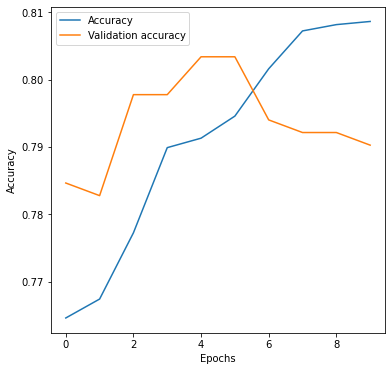




lengths :  [6411, 1602, 1605]
==== Training ANGINA ====

Epoch 1 / 10
2137/2137 [==============================] - 9s 4ms/step - loss: 0.4816 - acc: 0.8134 - lr: 0.0500
Validation
534/534 [==============================] - 20s 37ms/step - loss: 1.8972 - acc: 0.8624 - lr: 0.0500
Model saved. Acc updated: -inf -> 0.830
Epoch 2 / 10
2137/2137 [==============================] - 9s 4ms/step - loss: 0.3863 - acc: 0.8425 - lr: 0.0500
Validation
534/534 [==============================] - 21s 38ms/step - loss: 1.6678 - acc: 0.8700 - lr: 0.0500
Model saved. Acc updated: 0.830 -> 0.839
Epoch 3 / 10
2137/2137 [==============================] - 9s 4ms/step - loss: 0.3551 - acc: 0.8544 - lr: 0.0500
Validation
534/534 [==============================] - 21s 39ms/step - loss: 1.5734 - acc: 0.8734 - lr: 0.0500
Model saved. Acc updated: 0.839 -> 0.845
Epoch 4 / 10
2137/2137 [==============================] - 9s 4ms/step - loss: 0.3474 - acc: 0.8550 - lr: 0.0500
Validation
534/534 [====================

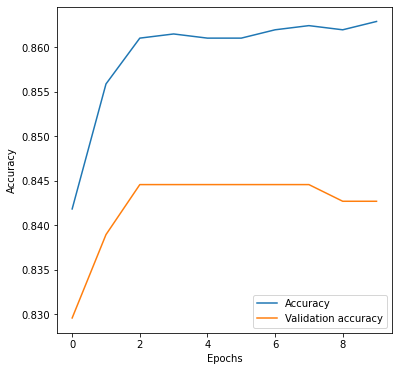




lengths :  [6411, 1602, 1605]
==== Training HOSPMI ====

Epoch 1 / 10
2137/2137 [==============================] - 8s 4ms/step - loss: 0.3806 - acc: 0.8685 - lr: 0.0500
Validation
534/534 [==============================] - 18s 35ms/step - loss: 2.1822 - acc: 0.9154 - lr: 0.0500
Model saved. Acc updated: -inf -> 0.901
Epoch 2 / 10
2137/2137 [==============================] - 9s 4ms/step - loss: 0.2953 - acc: 0.9030 - lr: 0.0500
Validation
534/534 [==============================] - 19s 36ms/step - loss: 1.7994 - acc: 0.9154 - lr: 0.0500
Epoch 3 / 10
2137/2137 [==============================] - 9s 4ms/step - loss: 0.2770 - acc: 0.9037 - lr: 0.0500
Validation
534/534 [==============================] - 19s 36ms/step - loss: 1.8245 - acc: 0.9223 - lr: 0.0500
Model saved. Acc updated: 0.901 -> 0.908
Epoch 4 / 10
2137/2137 [==============================] - 9s 4ms/step - loss: 0.2707 - acc: 0.9103 - lr: 0.0500
Validation
534/534 [==============================] - 24s 45ms/step - loss: 1.857

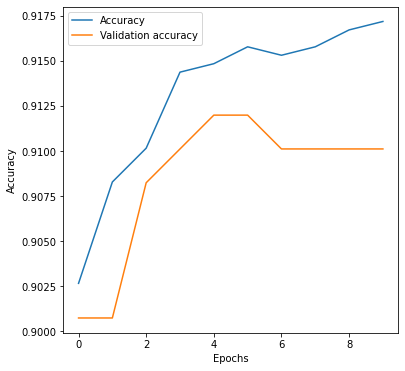




lengths :  [6411, 1602, 1605]
==== Training MI_FCHD ====

Epoch 1 / 10
2137/2137 [==============================] - 12s 5ms/step - loss: 0.4518 - acc: 0.8301 - lr: 0.0500
Validation
534/534 [==============================] - 26s 48ms/step - loss: 1.8284 - acc: 0.8736 - lr: 0.0500
Model saved. Acc updated: -inf -> 0.858
Epoch 2 / 10
2137/2137 [==============================] - 11s 5ms/step - loss: 0.3801 - acc: 0.8630 - lr: 0.0500
Validation
534/534 [==============================] - 22s 42ms/step - loss: 1.4820 - acc: 0.8736 - lr: 0.0500
Epoch 3 / 10
2137/2137 [==============================] - 9s 4ms/step - loss: 0.3547 - acc: 0.8633 - lr: 0.0500
Validation
534/534 [==============================] - 21s 39ms/step - loss: 1.4078 - acc: 0.8806 - lr: 0.0500
Model saved. Acc updated: 0.858 -> 0.865
Epoch 4 / 10
2137/2137 [==============================] - 9s 4ms/step - loss: 0.3469 - acc: 0.8698 - lr: 0.0500
Validation
534/534 [==============================] - 21s 39ms/step - loss: 1.

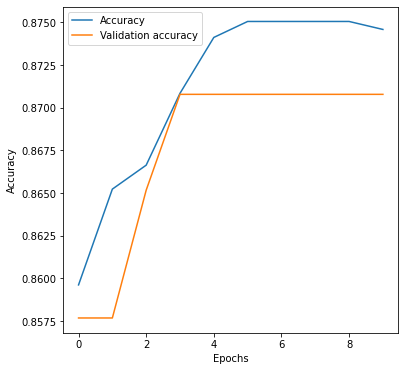




lengths :  [6411, 1602, 1605]
==== Training ANYCHD ====

Epoch 1 / 10
2137/2137 [==============================] - 11s 5ms/step - loss: 0.5824 - acc: 0.7441 - lr: 0.0500
Validation
534/534 [==============================] - 26s 49ms/step - loss: 1.2398 - acc: 0.7599 - lr: 0.0500
Model saved. Acc updated: -inf -> 0.734
Epoch 2 / 10
2137/2137 [==============================] - 11s 5ms/step - loss: 0.5089 - acc: 0.7528 - lr: 0.0500
Validation
534/534 [==============================] - 26s 49ms/step - loss: 1.0984 - acc: 0.7743 - lr: 0.0500
Model saved. Acc updated: 0.734 -> 0.755
Epoch 3 / 10
2137/2137 [==============================] - 12s 6ms/step - loss: 0.4708 - acc: 0.7618 - lr: 0.0500
Validation
534/534 [==============================] - 30s 56ms/step - loss: 0.9919 - acc: 0.7743 - lr: 0.0500
Epoch 4 / 10
2137/2137 [==============================] - 13s 6ms/step - loss: 0.4605 - acc: 0.7617 - lr: 0.0500
Validation
534/534 [==============================] - 32s 59ms/step - loss: 0

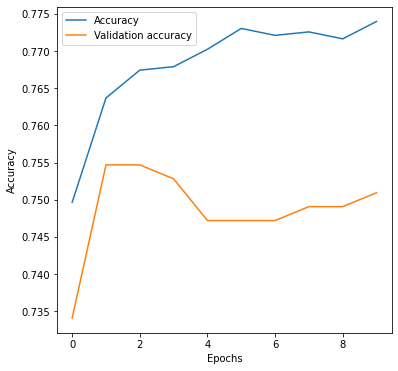




lengths :  [6411, 1602, 1605]
==== Training STROKE ====

Epoch 1 / 10
2137/2137 [==============================] - 13s 6ms/step - loss: 0.3391 - acc: 0.9185 - lr: 0.0500
Validation
534/534 [==============================] - 29s 54ms/step - loss: 0.0906 - acc: 0.9195 - lr: 0.0500
Model saved. Acc updated: -inf -> 0.914
Epoch 2 / 10
2137/2137 [==============================] - 12s 6ms/step - loss: 0.2796 - acc: 0.9185 - lr: 0.0500 
Validation
534/534 [==============================] - 29s 54ms/step - loss: 0.0907 - acc: 0.9195 - lr: 0.0500
Epoch 3 / 10
2137/2137 [==============================] - 12s 6ms/step - loss: 0.2698 - acc: 0.9185 - lr: 0.0500
Validation
534/534 [==============================] - 29s 54ms/step - loss: 0.0864 - acc: 0.9195 - lr: 0.0500
Epoch 4 / 10
2137/2137 [==============================] - 13s 6ms/step - loss: 0.2639 - acc: 0.9185 - lr: 0.0500
Validation
534/534 [==============================] - 29s 55ms/step - loss: 0.0856 - acc: 0.9195 - lr: 0.0500
Epoch 5

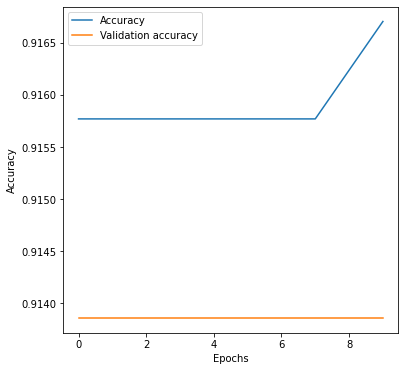




lengths :  [6411, 1602, 1605]
==== Training CVD ====

Epoch 1 / 10
2137/2137 [==============================] - 13s 6ms/step - loss: 0.5632 - acc: 0.7572 - lr: 0.0500
Validation
534/534 [==============================] - 29s 53ms/step - loss: 0.3170 - acc: 0.7723 - lr: 0.0500
Model saved. Acc updated: -inf -> 0.758
Epoch 2 / 10
2137/2137 [==============================] - 13s 6ms/step - loss: 0.4972 - acc: 0.7703 - lr: 0.0500
Validation
534/534 [==============================] - 28s 53ms/step - loss: 0.4071 - acc: 0.7723 - lr: 0.0500
Epoch 3 / 10
2137/2137 [==============================] - 13s 6ms/step - loss: 0.4743 - acc: 0.7738 - lr: 0.0500
Validation
534/534 [==============================] - 28s 52ms/step - loss: 0.4359 - acc: 0.7801 - lr: 0.0500
Model saved. Acc updated: 0.758 -> 0.768
Epoch 4 / 10
2137/2137 [==============================] - 12s 6ms/step - loss: 0.4635 - acc: 0.7742 - lr: 0.0500
Validation
534/534 [==============================] - 28s 53ms/step - loss: 0.44

In [ ]:
nb_epochs = 10
trainers = train_labels(df.iloc[:, 23: 31].columns, data_path, 
                        df.iloc[:, 23: 31].columns, split_proportions, 
                        save_directory, nb_epochs)

# Test

lengths :  [6411, 1602, 1605]
==== Evaluate DEATH ====

accuracy 73.64485981308411


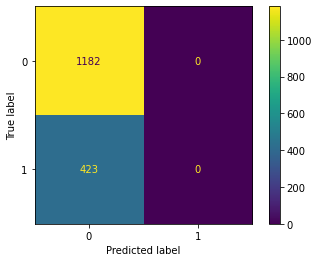

sensitivity : 0.0, specificity : 1.0, PPV : no positives values, NPV : 0.7364485981308411



lengths :  [6411, 1602, 1605]
==== Evaluate ANGINA ====

accuracy 81.6822429906542


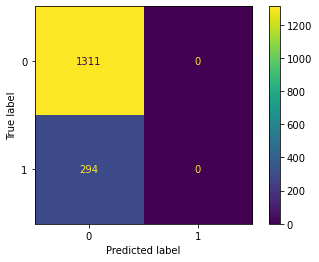

sensitivity : 0.0, specificity : 1.0, PPV : no positives values, NPV : 0.8168224299065421



lengths :  [6411, 1602, 1605]
==== Evaluate HOSPMI ====

accuracy 90.09345794392523


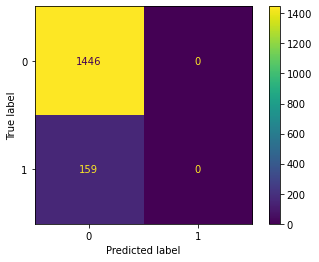

sensitivity : 0.0, specificity : 1.0, PPV : no positives values, NPV : 0.9009345794392524



lengths :  [6411, 1602, 1605]
==== Evaluate MI_FCHD ====

accuracy 84.85981308411215


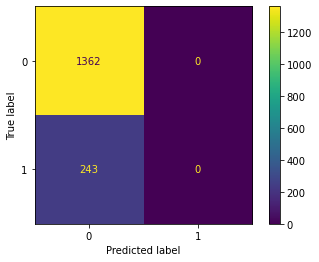

sensitivity : 0.0, specificity : 1.0, PPV : no positives values, NPV : 0.8485981308411215



lengths :  [6411, 1602, 1605]
==== Evaluate ANYCHD ====

accuracy 71.77570093457943


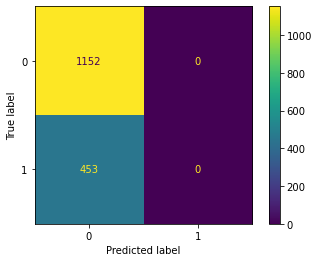

sensitivity : 0.0, specificity : 1.0, PPV : no positives values, NPV : 0.7177570093457943



lengths :  [6411, 1602, 1605]
==== Evaluate STROKE ====

accuracy 90.65420560747664


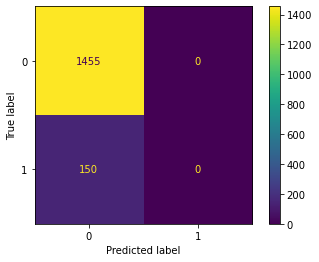

sensitivity : 0.0, specificity : 1.0, PPV : no positives values, NPV : 0.9065420560747663



lengths :  [6411, 1602, 1605]
==== Evaluate CVD ====

accuracy 75.88785046728972


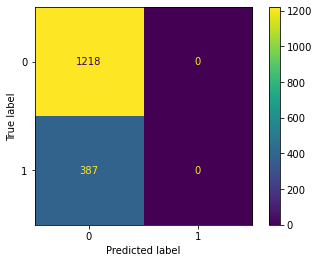

sensitivity : 0.0, specificity : 1.0, PPV : no positives values, NPV : 0.7588785046728972



lengths :  [6411, 1602, 1605]
==== Evaluate HYPERTEN ====

accuracy 24.672897196261683


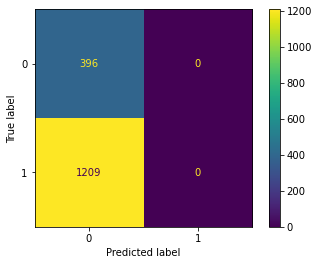

sensitivity : 0.0, specificity : 1.0, PPV : no positives values, NPV : 0.2467289719626168





In [16]:
accuracies = prediction_analyse_labels(df.iloc[:, 23: 31].columns, trainers, df.iloc[:, 23: 31].columns, data_path, split_proportions)

In [ ]:
save_accuracies_pkl(accuracies_file_path, accuracies)